# Decision Tree

### Predictors: All Variables

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
student_por = pd.read_csv('student-por.csv',sep=';')
student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [3]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

### The ordinal variables are converted from integer data type to object data type, as they are categorical. 

In [4]:
student_por['failures'] = student_por['failures'].astype(float)
student_por['absences'] = student_por['absences'].astype(float)
student_por['G1'] = student_por['G1'].astype(float)
student_por['G2'] = student_por['G2'].astype(float)
student_por['G3'] = student_por['G3'].astype(float)

In [5]:
student_por['Medu'] = student_por['Medu'].astype(object)
student_por['Fedu'] = student_por['Fedu'].astype(object)
student_por['traveltime'] = student_por['traveltime'].astype(object)
student_por['studytime'] = student_por['studytime'].astype(object)
student_por['famrel'] = student_por['famrel'].astype(object)
student_por['freetime'] = student_por['freetime'].astype(object)
student_por['goout'] = student_por['goout'].astype(object)
student_por['Dalc'] = student_por['Dalc'].astype(object)
student_por['Walc'] = student_por['Walc'].astype(object)
student_por['health'] = student_por['health'].astype(object)

In [6]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   age         649 non-null    int64  
 3   address     649 non-null    object 
 4   famsize     649 non-null    object 
 5   Pstatus     649 non-null    object 
 6   Medu        649 non-null    object 
 7   Fedu        649 non-null    object 
 8   Mjob        649 non-null    object 
 9   Fjob        649 non-null    object 
 10  reason      649 non-null    object 
 11  guardian    649 non-null    object 
 12  traveltime  649 non-null    object 
 13  studytime   649 non-null    object 
 14  failures    649 non-null    float64
 15  schoolsup   649 non-null    object 
 16  famsup      649 non-null    object 
 17  paid        649 non-null    object 
 18  activities  649 non-null    object 
 19  nursery     649 non-null    o

In [7]:
objDF = pd.DataFrame(student_por.select_dtypes(include=['object']))
objDF

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health
0,GP,F,U,GT3,A,4,4,at_home,teacher,course,...,yes,yes,no,no,4,3,4,1,1,3
1,GP,F,U,GT3,T,1,1,at_home,other,course,...,no,yes,yes,no,5,3,3,1,1,3
2,GP,F,U,LE3,T,1,1,at_home,other,other,...,yes,yes,yes,no,4,3,2,2,3,3
3,GP,F,U,GT3,T,4,2,health,services,home,...,yes,yes,yes,yes,3,2,2,1,1,5
4,GP,F,U,GT3,T,3,3,other,other,home,...,yes,yes,no,no,4,3,2,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,2,3,services,other,course,...,no,yes,yes,no,5,4,2,1,2,5
645,MS,F,U,LE3,T,3,1,teacher,services,course,...,yes,yes,yes,no,4,3,4,1,1,1
646,MS,F,U,GT3,T,1,1,other,other,course,...,yes,yes,no,no,1,1,1,1,1,5
647,MS,M,U,LE3,T,3,1,services,services,course,...,no,yes,yes,no,2,4,5,3,4,2


In [8]:
numDF = pd.DataFrame(student_por.select_dtypes(include=['int64', 'float64']))
numDF

,age,failures,absences,G1,G2,G3
0,18,0.0,4.0,0.0,11.0,11.0
1,17,0.0,2.0,9.0,11.0,11.0
2,15,0.0,6.0,12.0,13.0,12.0
3,15,0.0,0.0,14.0,14.0,14.0
4,16,0.0,0.0,11.0,13.0,13.0
...,...,...,...,...,...,...
644,19,1.0,4.0,10.0,11.0,10.0
645,18,0.0,4.0,15.0,15.0,16.0
646,18,0.0,6.0,11.0,12.0,9.0
647,17,0.0,6.0,10.0,10.0,10.0


### One-hot encoding is used to convert the nominal and ordinal variables into binary variables, so that they can be put into the decision tree as integer data type, along with the numeric variables. 

In [9]:
new_por = pd.DataFrame()

for obj in objDF:
    col = objDF[obj].unique()
    for i in col:
        new_por[obj+" "+str(i)] = (objDF[obj]==i).replace({True:'1', False: '0'})
        new_por[obj+" "+str(i)] = (objDF[obj]==i).astype(int)
        
for num in numDF:
    new_por[num] = numDF[num]
        
new_por

,school GP,school MS,sex F,sex M,address U,address R,famsize GT3,famsize LE3,Pstatus A,Pstatus T,...,health 5,health 1,health 2,health 4,age,failures,absences,G1,G2,G3
0,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,18,0.0,4.0,0.0,11.0,11.0
1,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,17,0.0,2.0,9.0,11.0,11.0
2,1,0,1,0,1,0,0,1,0,1,...,0,0,0,0,15,0.0,6.0,12.0,13.0,12.0
3,1,0,1,0,1,0,1,0,0,1,...,1,0,0,0,15,0.0,0.0,14.0,14.0,14.0
4,1,0,1,0,1,0,1,0,0,1,...,1,0,0,0,16,0.0,0.0,11.0,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,1,0,0,1,1,0,0,1,...,1,0,0,0,19,1.0,4.0,10.0,11.0,10.0
645,0,1,1,0,1,0,0,1,0,1,...,0,1,0,0,18,0.0,4.0,15.0,15.0,16.0
646,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,18,0.0,6.0,11.0,12.0,9.0
647,0,1,0,1,1,0,0,1,0,1,...,0,0,1,0,17,0.0,6.0,10.0,10.0,10.0


In [10]:
new_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 97 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school GP          649 non-null    int32  
 1   school MS          649 non-null    int32  
 2   sex F              649 non-null    int32  
 3   sex M              649 non-null    int32  
 4   address U          649 non-null    int32  
 5   address R          649 non-null    int32  
 6   famsize GT3        649 non-null    int32  
 7   famsize LE3        649 non-null    int32  
 8   Pstatus A          649 non-null    int32  
 9   Pstatus T          649 non-null    int32  
 10  Medu 4             649 non-null    int32  
 11  Medu 1             649 non-null    int32  
 12  Medu 3             649 non-null    int32  
 13  Medu 2             649 non-null    int32  
 14  Medu 0             649 non-null    int32  
 15  Fedu 4             649 non-null    int32  
 16  Fedu 1             649 non

## Building the model

In [11]:
predictors = new_por.drop(["G3"], axis=1) #predictor
G3obj = pd.DataFrame((student_por['G3'] >= 10).replace({True: 'Pass', False: 'Fail'})) #response

In [12]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the Dataset into Train and Test
pred_train, pred_test, G3_train, G3_test = train_test_split(predictors, G3obj, test_size = 0.25)

# Check the sample sizes
print("Train Set :", G3_train.shape, pred_train.shape)
print("Test Set  :", G3_test.shape, pred_test.shape)

Train Set : (486, 1) (486, 96)
Test Set  : (163, 1) (163, 96)


### G3 is split into pass or fail.

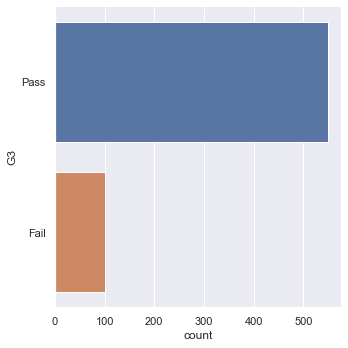

In [13]:
# Draw the distribution of Response
sb.catplot(y = "G3", data = G3obj, kind = "count")

### A decision tree of depth 4 is used. 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9588477366255144

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9079754601226994



<AxesSubplot:>

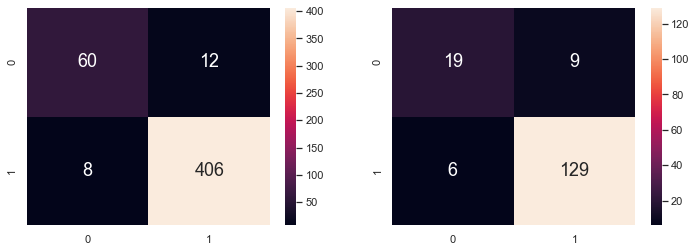

In [14]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(pred_train, G3_train)  # train the decision tree model

# Predict Response corresponding to Predictors
G3_train_pred = dectree.predict(pred_train)
G3_test_pred = dectree.predict(pred_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(pred_train, G3_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(pred_test, G3_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(G3_train, G3_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(G3_test, G3_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(1595.2235294117647, 3522.5280000000002, 'G2 <= 8.5\ngini = 0.252\nsamples = 486\nvalue = [72, 414]\nclass = Fail'),
 Text(472.6588235294118, 2739.744, 'G1 <= 8.5\ngini = 0.113\nsamples = 50\nvalue = [47, 3]\nclass = Pass'),
 Text(236.3294117647059, 1956.96, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]\nclass = Pass'),
 Text(708.9882352941177, 1956.96, 'Dalc 1 <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = Pass'),
 Text(472.6588235294118, 1174.176, 'age <= 15.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Fail'),
 Text(236.3294117647059, 391.3920000000003, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Pass'),
 Text(708.9882352941177, 391.3920000000003, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Fail'),
 Text(945.3176470588236, 1174.176, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Pass'),
 Text(2717.788235294118, 2739.744, 'G1 <= 9.5\ngini = 0.108\nsamples = 436\nvalue = [25, 411]\nclass = Fail'),
 Text(1890.6352941176472, 1956.96, 'G2 <= 9.5\ngini 

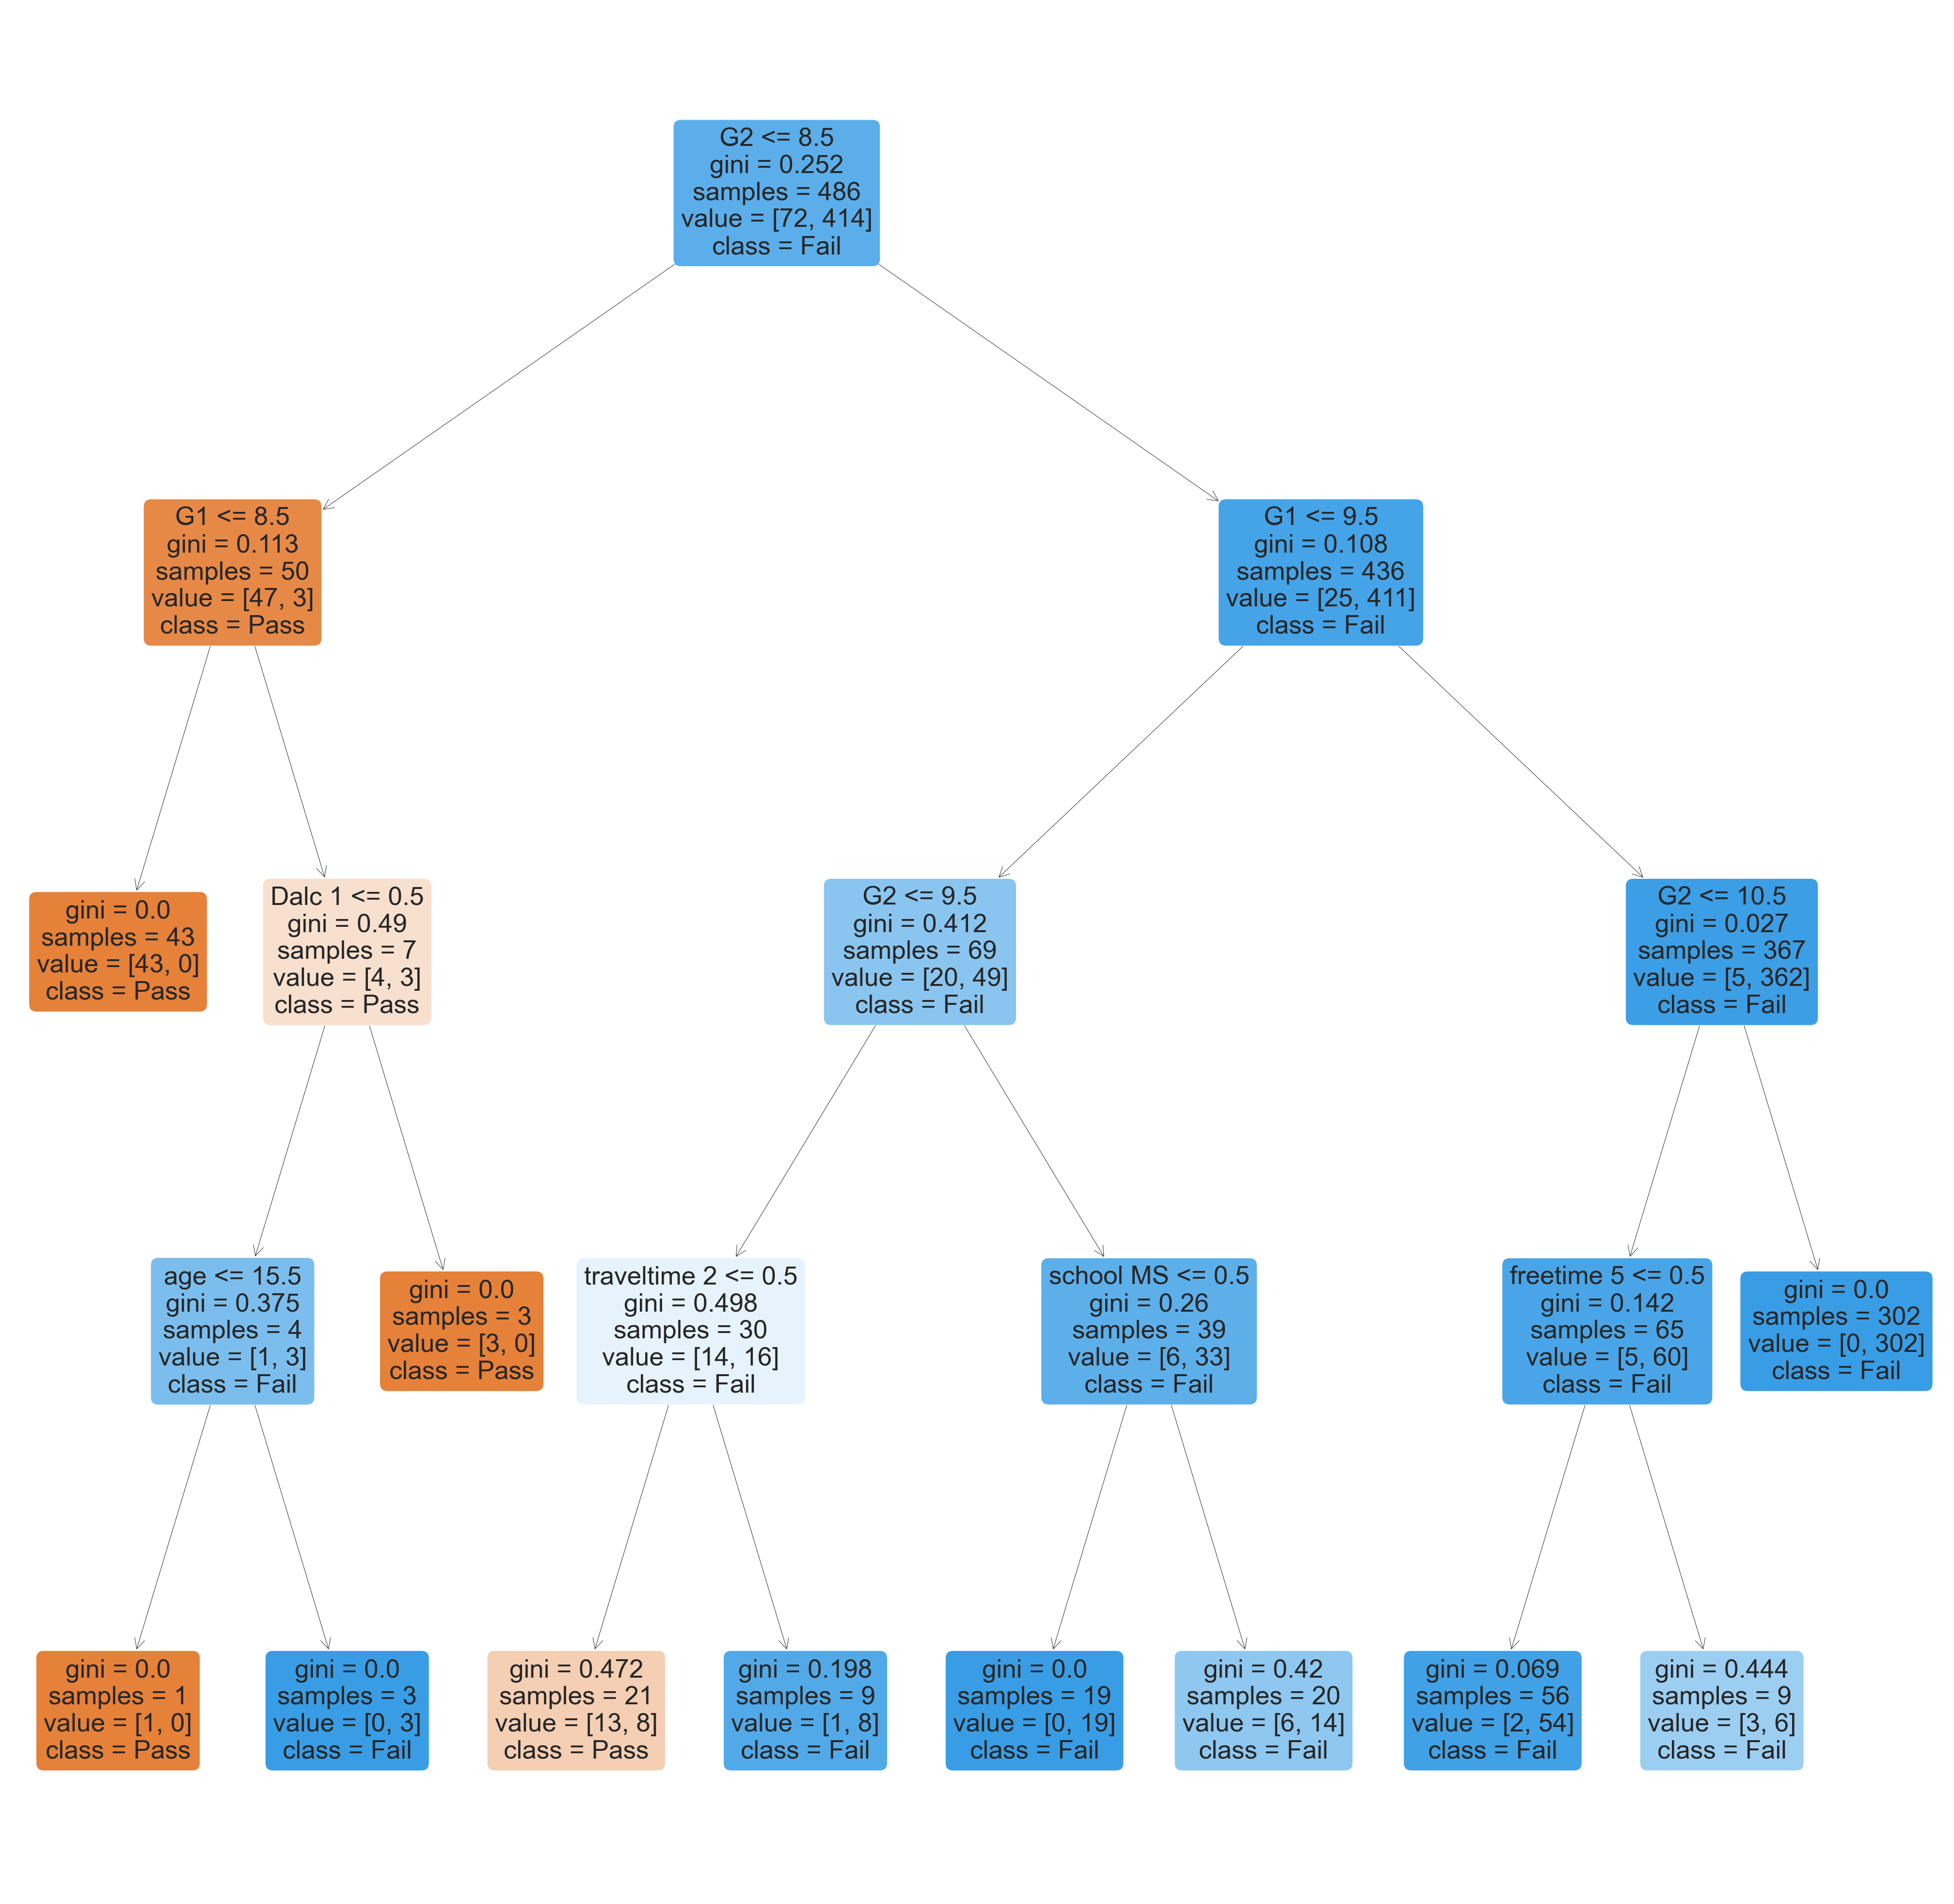

In [15]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(72, 72))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=pred_train.columns, 
          class_names=["Pass", "Fail"])

----------------------------------------------------------------------------------------------------------------

### G3 is split into 4 bands.

In [16]:
G3 = pd.DataFrame(student_por['G3'])

G3Band = pd.DataFrame()

G3Band['G3'] = pd.DataFrame(student_por['G3']).replace([0, 1, 2, 3, 4], 'Band 1')
G3Band['G3'] = pd.DataFrame(G3Band['G3']).replace([5, 6, 7, 8, 9], 'Band 2')
G3Band['G3'] = pd.DataFrame(G3Band['G3']).replace([10, 11, 12, 13, 14], 'Band 3')
G3Band['G3'] = pd.DataFrame(G3Band['G3']).replace([15, 16, 17, 18, 19], 'Band 4')

G3Band

,G3
0,Band 3
1,Band 3
2,Band 3
3,Band 3
4,Band 3
...,...
644,Band 3
645,Band 4
646,Band 2
647,Band 3


In [17]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the Dataset into Train and Test
pred_train, pred_test, G3Band_train, G3Band_test = train_test_split(predictors, G3Band, test_size = 0.25)

# Check the sample sizes
print("Train Set :", G3Band_train.shape, pred_train.shape)
print("Test Set  :", G3Band_test.shape, pred_test.shape)

Train Set : (486, 1) (486, 96)
Test Set  : (163, 1) (163, 96)


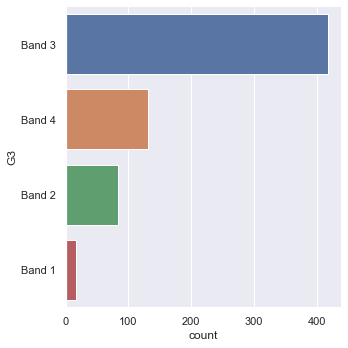

In [18]:
# Draw the distribution of Response
sb.catplot(y = "G3", data = G3Band, kind = "count")

### A decision tree of depth 4 is used.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9218106995884774

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.803680981595092



<AxesSubplot:>

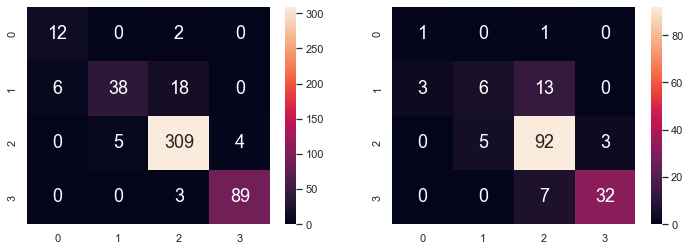

In [19]:
# Decision Tree using Train Data
dectreeBand = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectreeBand.fit(pred_train, G3Band_train)  # train the decision tree model

# Predict Response corresponding to Predictors
G3Band_train_pred = dectreeBand.predict(pred_train)
G3Band_test_pred = dectreeBand.predict(pred_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectreeBand.score(pred_train, G3Band_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectreeBand.score(pred_test, G3Band_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(G3Band_train, G3Band_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(G3Band_test, G3Band_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [27]:
conf_mat = np.array(
    [[1,0,1,0],
    [3,6,13,0],
    [0,5,92,3],
    [0,0,7,32]])

In [28]:
def get_tpr_fnr_fpr_tnr(cm):
    """
    This function returns class-wise TPR, FNR, FPR & TNR
    [[cm]]: a 2-D array of a multiclass confusion matrix
            where horizontal axes represent actual classes
            and vertical axes represent predicted classes
    {output}: a dictionary of class-wise accuracy parameters
    """
    dict_metric = dict()
    n = len(cm[0])
    row_sums = cm.sum(axis=1)
    col_sums = cm.sum(axis=0)
    array_sum = sum(sum(cm))
    #initialize a blank nested dictionary
    for i in range(1, n+1):
        keys = str(i)
        dict_metric[keys] = {"TPR":0, "FNR":0, "FPR":0, "TNR":0}
    # calculate and store class-wise TPR, FNR, FPR, TNR
    for i in range(n):
        for j in range(n):
            if i == j:
                keys = str(i+1)
                tp = cm[i, j]
                fn = row_sums[i] - cm[i, j]
                dict_metric[keys]["TPR"] = tp / (tp + fn)
                dict_metric[keys]["FNR"] = fn / (tp + fn)
                fp = col_sums[i] - cm[i, j]
                tn = array_sum - tp - fn - fp
                dict_metric[keys]["FPR"] = fp / (fp + tn)
                dict_metric[keys]["TNR"] = tn / (fp + tn)
    return dict_metric

In [29]:
df = pd.DataFrame(get_tpr_fnr_fpr_tnr(conf_mat)).transpose()
df

,TPR,FNR,FPR,TNR
1,0.500000,0.500000,0.018634,0.981366
2,0.272727,0.727273,0.035461,0.964539
3,0.920000,0.080000,0.333333,0.666667
4,0.820513,0.179487,0.024194,0.975806


[Text(2917.542857142857, 4696.704000000001, 'G2 <= 13.5\ngini = 0.519\nsamples = 486\nvalue = [14, 62, 318, 92]\nclass = Band 3'),
 Text(1530.5142857142857, 3652.992, 'G1 <= 8.5\ngini = 0.343\nsamples = 376\nvalue = [14, 62, 298, 2]\nclass = Band 3'),
 Text(765.2571428571429, 2609.2800000000007, 'G2 <= 8.5\ngini = 0.534\nsamples = 73\nvalue = [12, 46, 15, 0]\nclass = Band 2'),
 Text(382.62857142857143, 1565.5680000000002, 'absences <= 1.0\ngini = 0.391\nsamples = 45\nvalue = [12, 33, 0, 0]\nclass = Band 2'),
 Text(191.31428571428572, 521.8560000000007, 'gini = 0.444\nsamples = 18\nvalue = [12, 6, 0, 0]\nclass = Band 1'),
 Text(573.9428571428572, 521.8560000000007, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0, 0]\nclass = Band 2'),
 Text(1147.8857142857144, 1565.5680000000002, 'Mjob other <= 0.5\ngini = 0.497\nsamples = 28\nvalue = [0, 13, 15, 0]\nclass = Band 3'),
 Text(956.5714285714286, 521.8560000000007, 'gini = 0.43\nsamples = 16\nvalue = [0, 11, 5, 0]\nclass = Band 2'),
 Text(1339

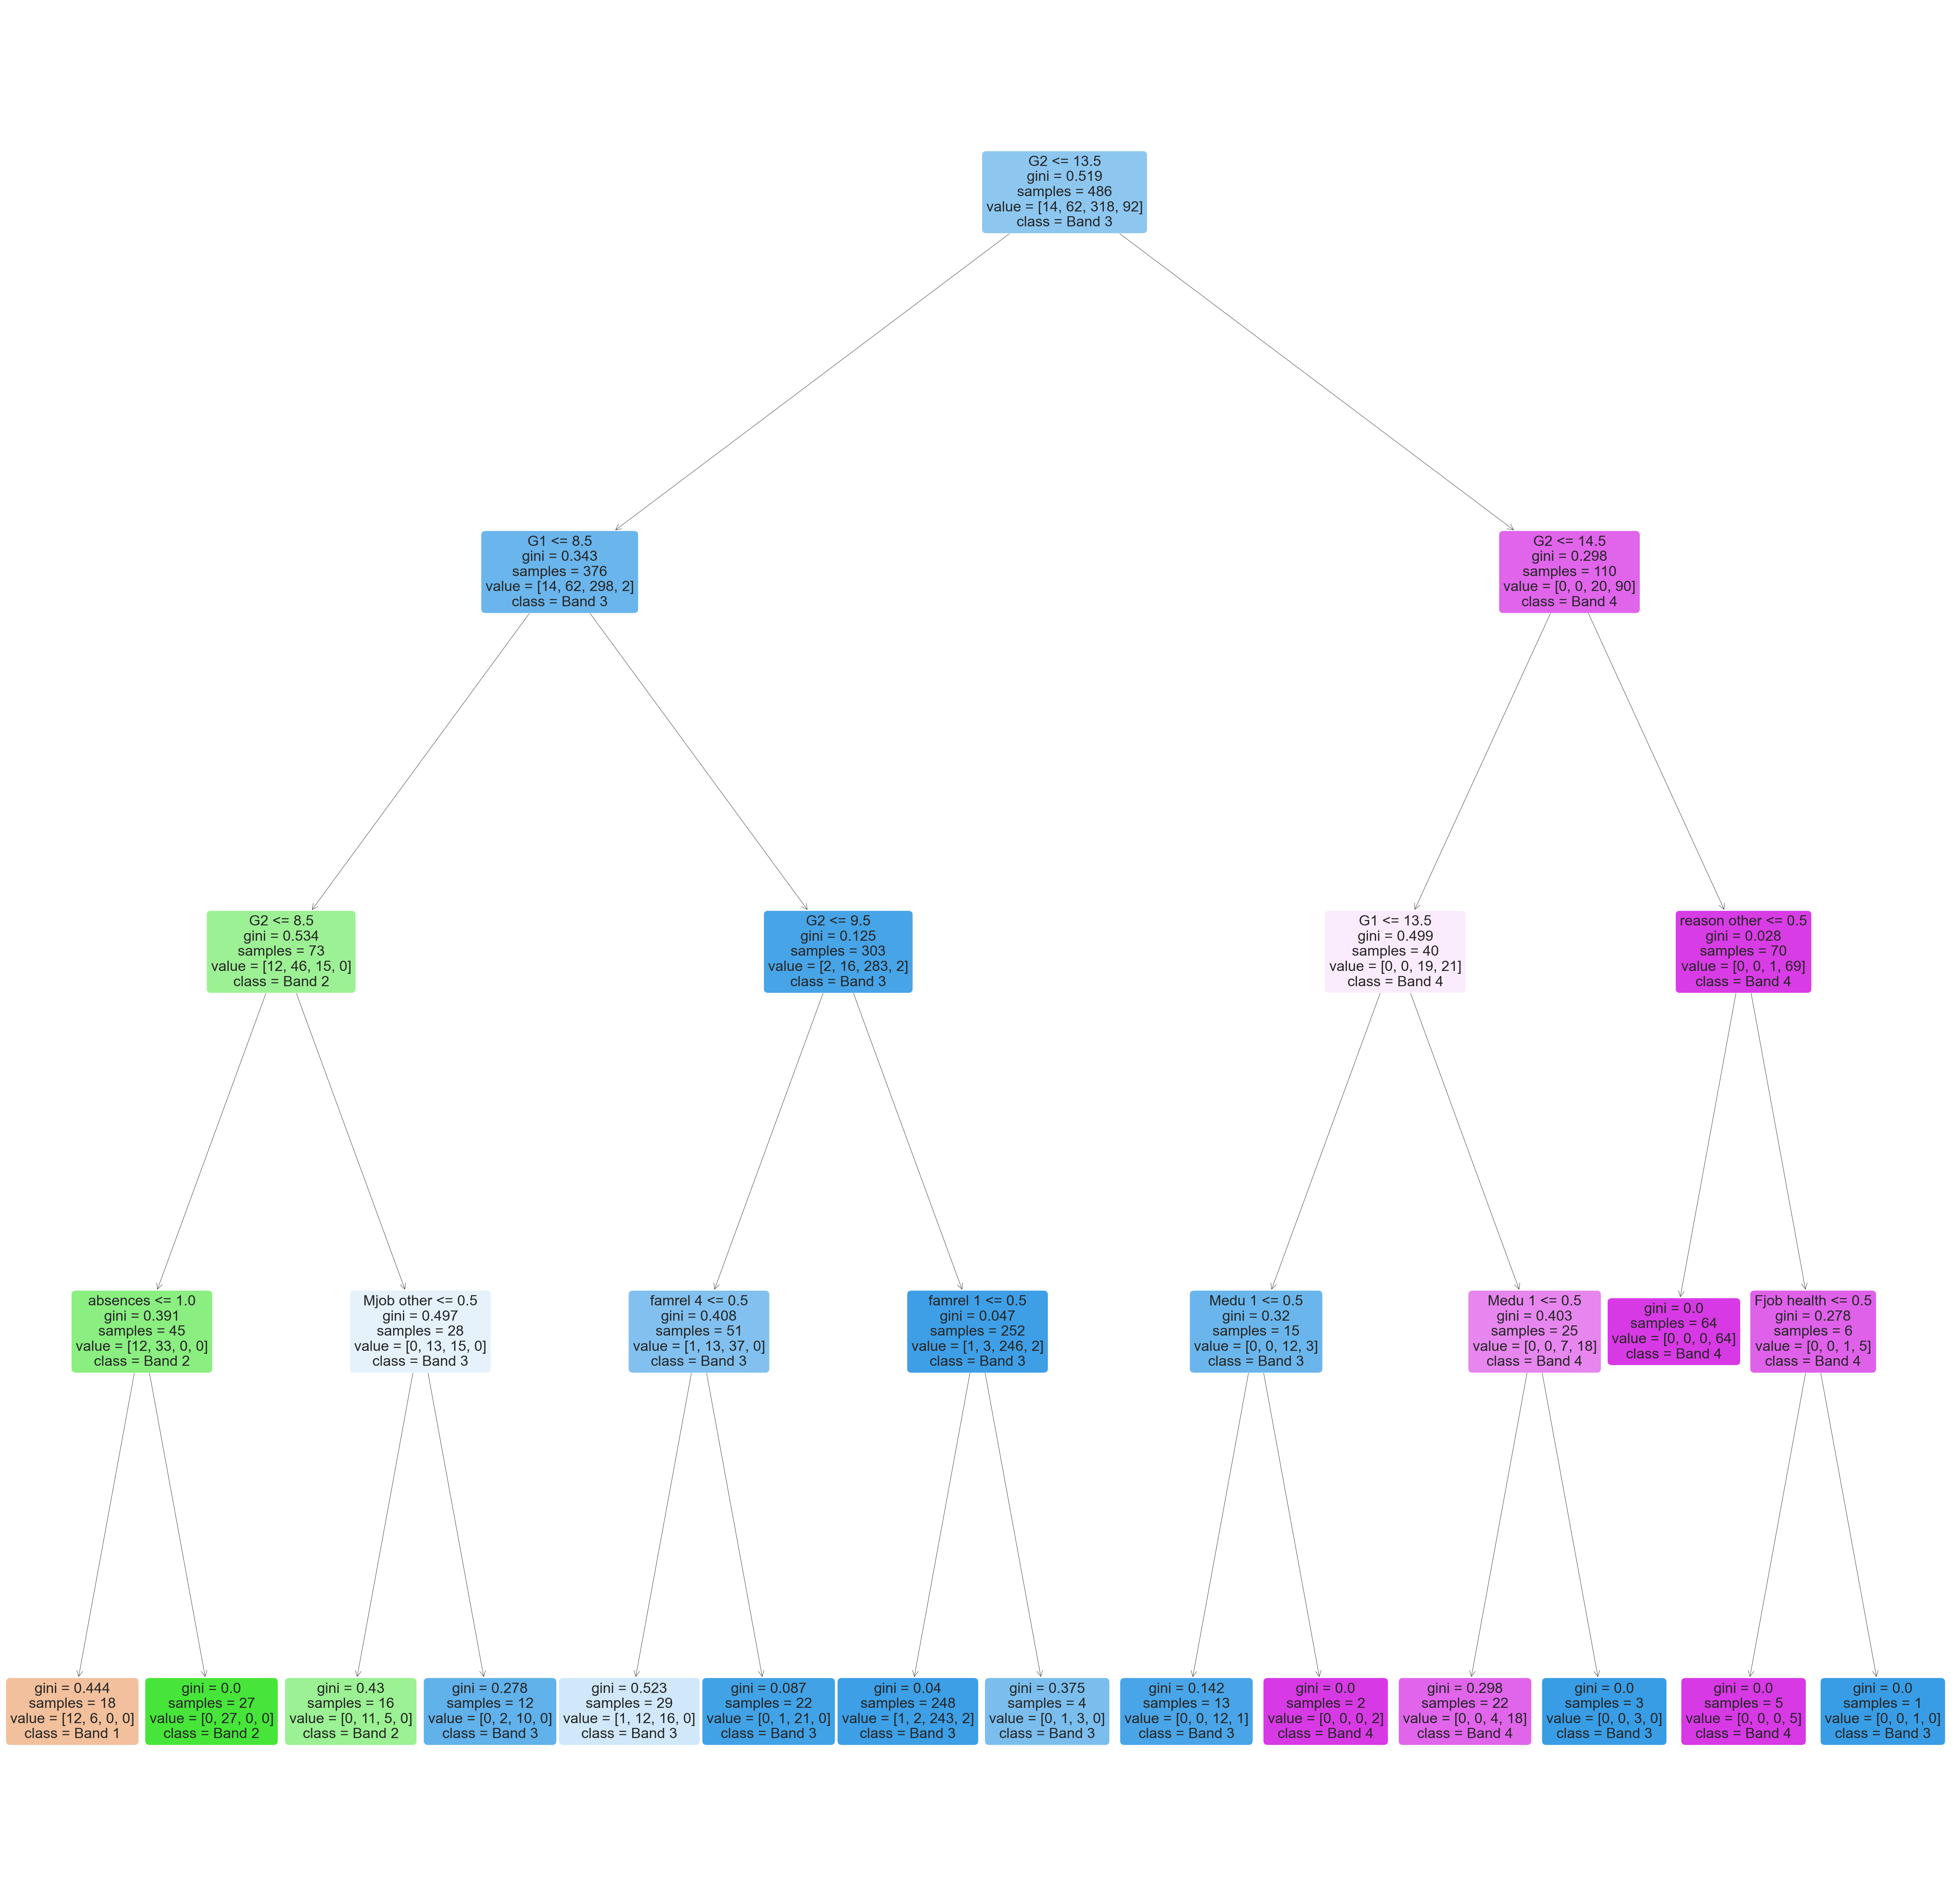

In [20]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(96, 96))
plot_tree(dectreeBand, filled=True, rounded=True, 
          feature_names=pred_train.columns, 
          class_names=["Band 1", "Band 2", "Band 3", "Band 4"],
         fontsize=40)